# Collision Detection
Here we test our collision detection approaches: sampling based vs theoretical bounds


[(0, 0), (1, 0)]
car 0: line 2
The value is   0.892342879303175
____
car 0: line 3
The value is   0.005127192194493424
____
sum per car =  0.8974700714976684
diff =  0.10252992850233156
++++++++++++++
car 1: line 2
The value is   0.9979818154485127
____
car 1: line 3
The value is   1.3149554528302243e-05
____
sum per car =  0.9979949650030411
diff =  0.002005034996958921
++++++++++++++
###################
point c max prob =  1.8903246947516879
point c bound prob =  0.9979949650030411
###################
[(0, 0), (1, 1)]
car 0: line 2
The value is   0.9948728078055066
____
car 0: line 3
The value is   4.906337487736723e-05
____
sum per car =  0.994921871180384
diff =  0.005078128819616001
++++++++++++++
car 1: line 2
The value is   0.9999715640517494
____
car 1: line 3
The value is   4.314067547639411e-08
____
sum per car =  0.9999716071924248
diff =  2.8392807575161605e-05
++++++++++++++
###################
point c max prob =  1.994844371857256
point c bound prob =  0.9999716071924248


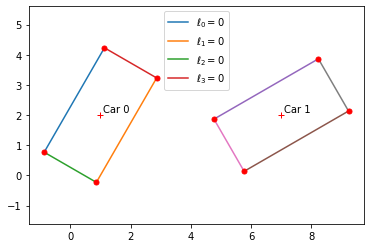

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from importlib import reload
import collision as c
reload(c)


cov = np.array([[2,1], [1,2]])
c1 = c.car(theta=np.pi/3, W=2, L=4, bx=1, by=2,cov=cov, name= "Car 0")
c2 = c.car(theta=np.pi/6, W=2, L=4, bx=7, by=2,cov=cov, name= "Car 1")
c1.plot(show_line_labels=True)
c2.plot()
# c1.tolerance = 0
# c2.tolerance = 0

# idx = [[(0,1),(1,0)], [(0,0), (1,1)], [(0,2), (1,3)], [(0,3),(0,2)]] 
# truth = c.prob_collision(c1,c2,sample_size = 10000, idx=idx)
# idx = [[(0,1),(1,0)]]
# truth = c.prob_collision(c1,c2,sample_size = 1000, idx=idx, violate_lines=[(0,2),(0,3)])
truth = c.prob_collision(c1,c2,sample_size = 10000)

                    
c.prob_collision_upper_bound(c1,c2)

print("______________________")
print("sample prob = ", truth)



# sel_points = c.select_collision_points(c1,c2,idx=[[(0,1),(1,0)]], violate_lines=[(0,2), (0,3)] )
# c1.plot_sample(show_line_labels=True,color=None)
# c2.plot_sample(color="blue")
# for p in sel_points:
#     plt.plot([p[0]], [p[1]], marker='o', markersize=15, color="black")

## Candidate Collision points 
The blue dots below represent candidate collision points (an intersection between any pair of lines). Red dots can be seen by adjusting the location of the two cars. these represent actual collision points.


# of candidate points =  16
# of collision points =  0
Collision:  False


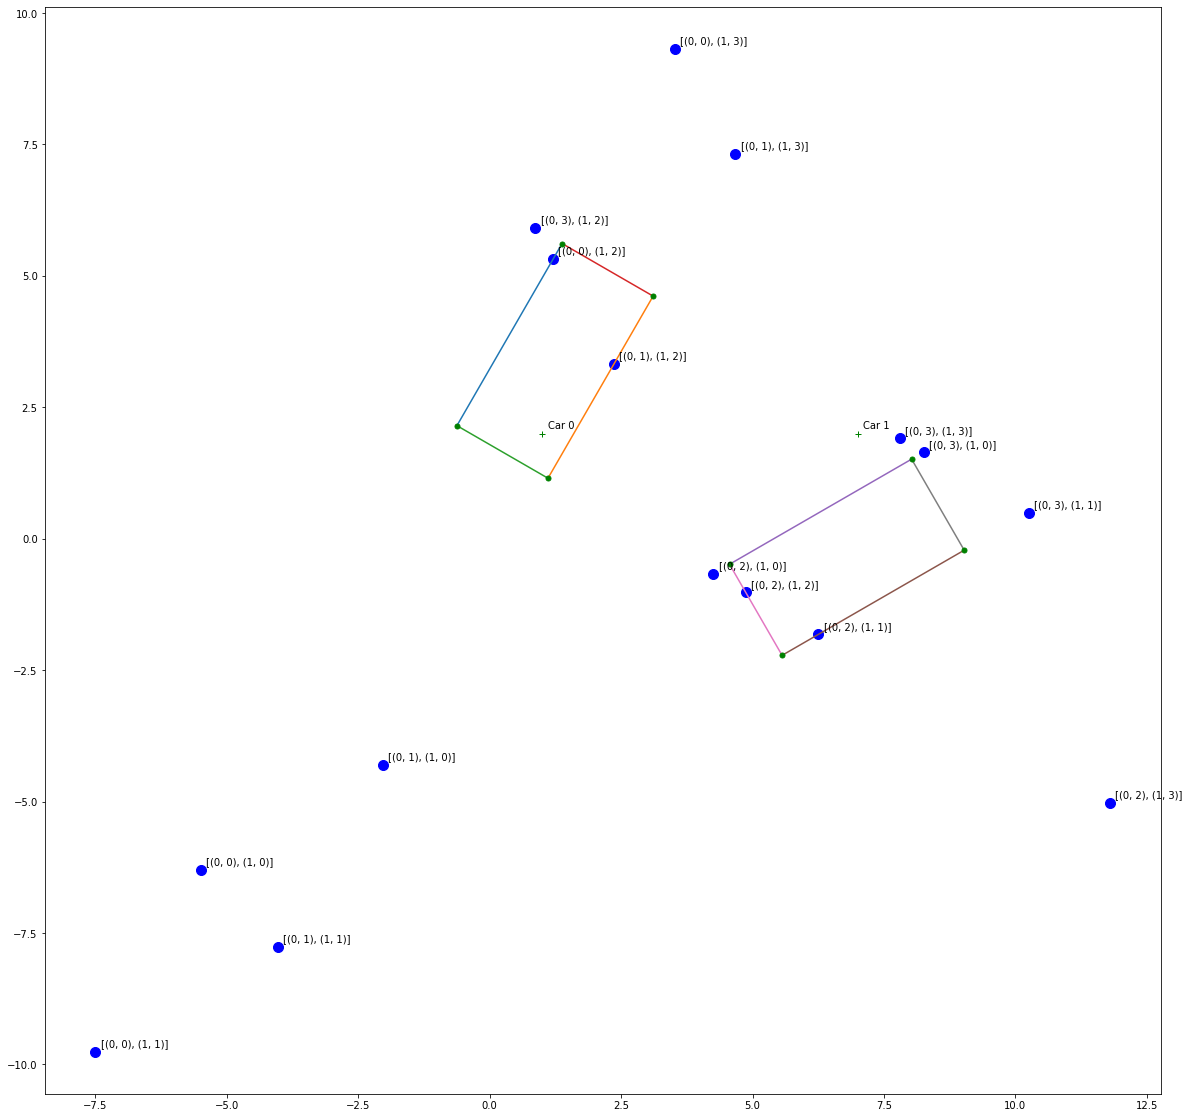

In [9]:
fig= plt.figure(figsize=(20,20))

points, idx = c._candidate_collision_points(c1,c2)
for p,i in zip(points, idx):
    plt.plot([p[0]], [p[1]], marker='o', markersize=10, color="blue")
    plt.text(p[0]+.1, p[1]+.1, str(i))
c1.plot(color="green")
c2.plot(color="green")
print("# of candidate points = ", len(points))

col_points = c.collision_points(c1,c2)
print("# of collision points = ", len(col_points))
for p in col_points:
    plt.plot([p[0]], [p[1]], marker='o', markersize=10, color="red")

    
print("Collision: ", c.test_collision(c1,c2))

# Sampling based

# of candidate points =  16
# of collision points =  0


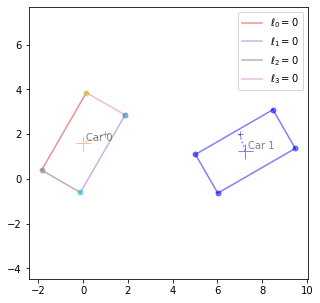

In [13]:
reload(c)
fig= plt.figure(figsize=(5,5))

c1.sample()
c1.plot_sample(alpha=.5, show_line_labels=True, color=None)
c2.sample()
c2.plot_sample(alpha=.5,color="blue")
points, _ = c._candidate_collision_points(c1,c2)
print("# of candidate points = ", len(points))

col_points = c.collision_points(c1,c2)
print("# of collision points = ", len(col_points))

for p in col_points:
    plt.plot([p[0]], [p[1]], marker='o', markersize=10, color="red")

    
    
# sel_points = c.select_collision_points(c1,c2,idx=[[(0,1),(1,0)]], violate_lines=[(0,2)] )

# for p in sel_points:
#     plt.plot([p[0]], [p[1]], marker='o', markersize=15, color="black")

In [9]:
import time

# t1 = time.clock()
t1 = time.time()
print("Probability of collision ~", c.prob_collision(c1,c2, sample_size=100000))
# print(time.time()-t1)
# print(time.clock()-t1)

# c.prob_collision(c1,c2,sample_size = 10000, idx=[[(0,1),(1,0)]], for_vehicle=None)

Probability of collision ~ 0.04393


## Plot $n$ samples along with collisions
Collisions are shown as black dots

Num Collision Cases =  0  ~ Pr(Collision) =  0.0


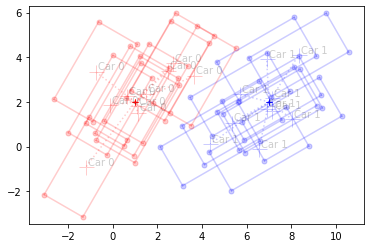

In [12]:
count = 0
sample_size = 10
for i in range(sample_size):
    c1.sample()
    c2.sample()
    c1.plot_sample(alpha=.2)
    c2.plot_sample(alpha=.2, color="blue")
    col_points = c.collision_points(c1,c2)
    for p in col_points:
        plt.plot([p[0]], [p[1]], marker='o', markersize=12, color="black")
        count += 1
        break
print("Num Collision Cases = ", count, " ~ Pr(Collision) = ", count/sample_size)


# Other experiments

[3. 1.] [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


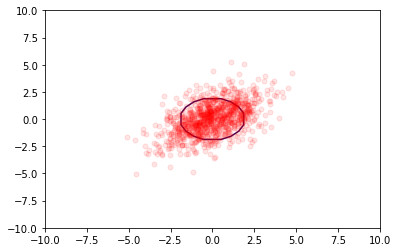

In [62]:
from numpy.linalg import inv, eig
cov = np.array([[2,1], [1,2]])
inv = inv(cov)
w,v = eig(cov)
print(w,v)

for i in range(1000):
    r = np.random.multivariate_normal([0,0], cov)  
    plt.plot([r[0]], [r[1]], marker='o', markersize=5, color="red", alpha=0.1)
    

y = np.linspace(-10,10,20)
x = np.linspace(-10,10,20)
xv,yv = np.meshgrid(x,y)

P = xv**2/cov[0][0] + yv**2/cov[1][1] 





plt.contour(xv,yv,P,[2])
# plt.xlim([-1.5,1.5])
# plt.ylim([-11.5,-8.5])

## Note
It seems numpy multivariate sampling is much slower than single variate (we are talking about around **20x speed up!**). See the experiments below.

Below we test the distribution between two cases:
* sample a multi-variate variable $\omega=(\omega_x, \omega_y)$, then subsitute into $\gamma_k$
* sample $\gamma_k$ directly using its standard deviation as shown in Table 1 in the latex document

Both distributions look the same, experimentally asserting that our analysis is correct. However, the running time of the second approach is around $20$ times faster.

total sampling time: 1.1132989999989462


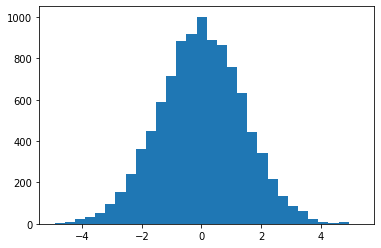

In [193]:
import time

cov = c1.cov
g1 = []
total1 = 0
for i in range(10000):
    t1=time.clock()
    omega = np.random.multivariate_normal([0, 0], cov)
    total1 += time.clock()-t1
    g1.append( - np.tan(c1.theta) * omega[0] + omega[1] )
    
print("total sampling time:", total1)
plt.hist(g1, bins=30);

total sampling time: 0.055481000000327185
Speed up factor: 18.590328220364437


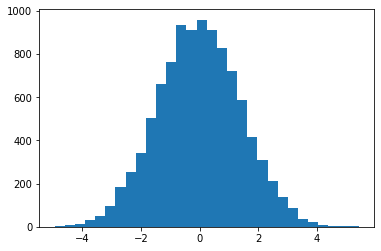

In [192]:
g2 = []
total2 = 0
for i in range(10000):
    t1=time.clock()
    gamma = np.random.normal(0, c1.std_gamma[0])
    total2 += time.clock()-t1
    g2.append( gamma )

plt.hist(g2, bins=30);

print("total sampling time:", total2)
print("Speed up factor:", total1/total2)